## Importing Documents

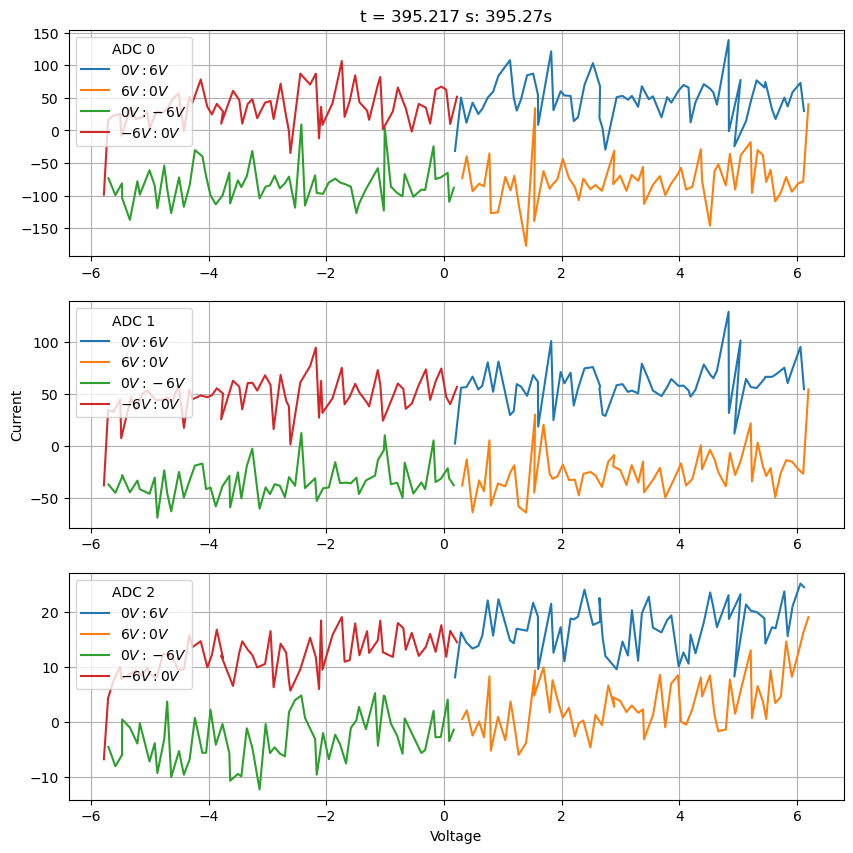

In [12]:
import numpy as np
import os
from scipy import signal
import UDIP_Lib_V19 as UDIP_Lib  #making updating UDIP_Lib easier
import RockSat_1_14_fitting_functions as R_fitting
import UDIP_Fitting 
import json
import matplotlib.pyplot as plt
from RockSat_json import *

year = 2021
packets = import_data(f'../{year}/{year}_packet.json')

def get_sweep(sw, cn = 0):

  sec = np.linspace(0, 1, 5)

  start = sw['Start']
  stop =  sw['Stop']

  sw['Voltage'] = np.array(sw['Voltage'])
  sw[f'Current{cn}'] = np.array(sw[f'Current{cn}'])

  V1 = sw['Voltage']     [0: int(sec[1] * len(sw['Voltage' ]))]
  I1 = sw[f'Current{cn}'][0: int(sec[1] * len(sw[f'Current1']))]

  V2 = sw['Voltage']     [int(sec[1]*len(sw['Voltage' ]))      :int(sec[2]*len(sw['Current1'])) ]
  I2 = sw[f'Current{cn}'][int(sec[1]*len(sw[f'Current{cn}']))  :int(sec[2]*len(sw['Current1'])) ]

  V3 = sw['Voltage']     [int(sec[2]*len(sw['Voltage' ]))      :int(sec[3]*len(sw['Current1'])) ]
  I3 = sw[f'Current{cn}'][int(sec[2]*len(sw[f'Current{cn}']))  :int(sec[3]*len(sw['Current1'])) ] 

  V4 = sw['Voltage']     [int(sec[3]*len(sw['Voltage' ]))      :int(sec[4]*len(sw['Current1'])) ]
  I4 = sw[f'Current{cn}'][int(sec[3]*len(sw[f'Current{cn}']))  :int(sec[4]*len(sw['Current1'])) ]

  Vf = sw['Voltage']     [int(sec[1]*len(sw['Voltage' ]))      :int(sec[3]*len(sw['Current1'])) ]
  If = sw[f'Current{cn}'][int(sec[1]*len(sw[f'Current{cn}']))  :int(sec[3]*len(sw['Current1'])) ]
  return start, stop, V1, I1, V2, I2, V3, I3, V4, I4

sw_range = np.arange(0,int(len(packets['packets']['Medium'])), 100)

cn = 0
fig, axs = plt.subplots(3, 1, figsize=(10, 10))
for i in sw_range:
  for axnum in np.arange(len(axs)):
    axs[axnum].clear()
    cn = axnum
    start, stop, V1, I1, V2, I2, V3, I3, V4, I4 = get_sweep(packets['packets']['Medium'][f'{i}'], cn = cn)

    axs[axnum].plot(V1, I1 , label = r'$ 0V : 6V$')
    axs[axnum].plot(V2, I2 , label = r'$ 6V:  0V$')
    axs[axnum].plot(V3, I3 , label = r'$ 0V: -6V$')
    axs[axnum].plot(V4, I4 , label = r'$-6V : 0V$')
    axs[axnum].legend(title = f'ADC {cn}', loc = 'upper left')
    axs[axnum].grid()
  axs[0].set_title(f't = {start/1000} s: {stop/1000}s')
  axs[2].set_xlabel('Voltage')
  axs[1].set_ylabel('Current')
  plt.savefig(f'../{year}/Sweeps/sw_{i}.jpg' ,dpi = 400)

## Extracting Electron Density and Temperature

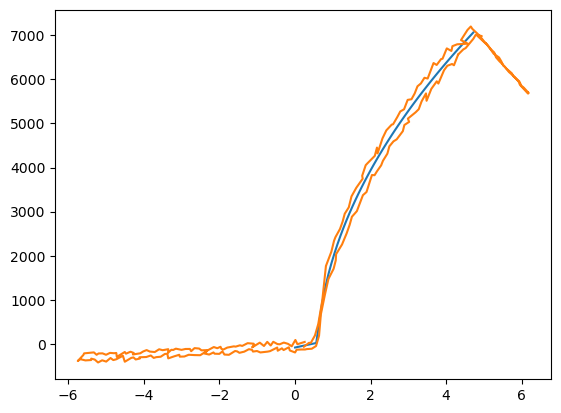

In [4]:
I=packets['packets']['Medium']['1100']['Current0']
V=packets['packets']['Medium']['1100']['Voltage']

x, y, popt, pcov= R_fitting.gen_fit(np.array(V), np.array(I))

#print(popt)
#popt[3], popt[4]

plt.plot(x,y)
plt.plot(V,I)

#I am so incredibly stupid and deleted code again. 

#### Electron and Temperature Values from 1100 -> 1800

In [5]:
I=packets['packets']['Medium']['1100']['Current0']
V=packets['packets']['Medium']['1100']['Voltage']
x, y, popt, pcov= R_fitting.gen_fit(np.array(V), np.array(I))
popt[3], popt[4]

(54573412917.864746, 713.6397941673537)

In [6]:
I=packets['packets']['Medium']['1200']['Current0']
V=packets['packets']['Medium']['1200']['Voltage']
x, y, popt, pcov= R_fitting.gen_fit(np.array(V), np.array(I))
popt[3], popt[4]

(84594524958.30319, 652.7071121251162)

In [7]:
I=packets['packets']['Medium']['1300']['Current0']
V=packets['packets']['Medium']['1300']['Voltage']
x, y, popt, pcov= R_fitting.gen_fit(np.array(V), np.array(I))
popt[3], popt[4]

(54023121829.20537, 768.203720536197)

In [8]:
I=packets['packets']['Medium']['1400']['Current0']
V=packets['packets']['Medium']['1400']['Voltage']
x, y, popt, pcov= R_fitting.gen_fit(np.array(V), np.array(I))
popt[3], popt[4]

(66884863586.521324, 987.265697026141)

In [9]:
I=packets['packets']['Medium']['1500']['Current0']
V=packets['packets']['Medium']['1500']['Voltage']
x, y, popt, pcov= R_fitting.gen_fit(np.array(V), np.array(I))
popt[3], popt[4]

(54855489765.892914, 612.292531717369)

In [10]:
I=packets['packets']['Medium']['1600']['Current0']
V=packets['packets']['Medium']['1600']['Voltage']
x, y, popt, pcov= R_fitting.gen_fit(np.array(V), np.array(I))
popt[3], popt[4]

(38746393847.296974, 883.6351813950359)

In [11]:
I=packets['packets']['Medium']['1700']['Current0']
V=packets['packets']['Medium']['1700']['Voltage']
x, y, popt, pcov= R_fitting.gen_fit(np.array(V), np.array(I))
popt[3], popt[4]

(44963054584.783264, 707.3095343467148)

In [12]:
I=packets['packets']['Medium']['1800']['Current0']
V=packets['packets']['Medium']['1800']['Voltage']
x, y, popt, pcov= R_fitting.gen_fit(np.array(V), np.array(I))
popt[3], popt[4]

(39500821321.38444, 1588.7088935499557)

#### Electron Temperature vs. Density Plot (Raw)

Text(0, 0.5, 'Electron Density ($m^3$)')

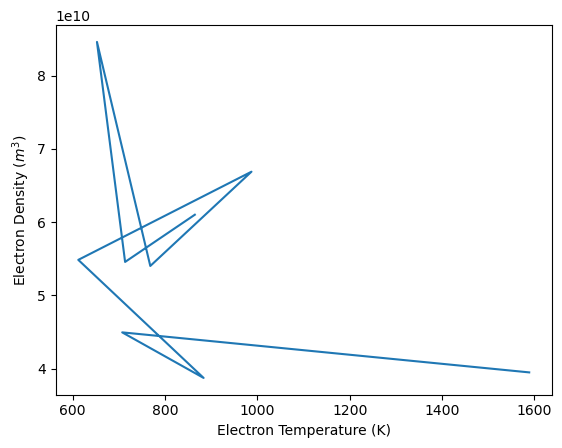

In [13]:
temperatures = [864.6196781209961, 713.6397941673537, 652.7071121251162, 768.203720536197, 987.265697026141, 612.292531717369, 883.6351813950359, 707.3095343467148, 1588.7088935499557] 
densities = [61015838882.32636, 54573412917.864746, 84594524958.30319, 54023121829.20537, 66884863586.521324, 54855489765.892914, 38746393847.296974, 44963054584.783264, 39500821321.38444]
                
plt.plot(temperatures, densities)
plt.xlabel('Electron Temperature (K)')
plt.ylabel('Electron Density ($m^3$)')

#### Electron Temperature vs. Density Plot (Experimentation)

In [14]:
temperatures = [864.6196781209961, 713.6397941673537, 652.7071121251162, 768.203720536197, 987.265697026141, 612.292531717369, 883.6351813950359, 707.3095343467148, 1588.7088935499557]
densities = [61015838882.32636, 54573412917.864746, 84594524958.30319, 54023121829.20537, 66884863586.521324, 54855489765.892914, 38746393847.296974, 44963054584.783264, 39500821321.38444]

zipped_data = list(zip(temperatures, densities))
sorted_data = sorted(zipped_data, key=lambda x: x[0])
sorted_temperatures, sorted_densities = zip(*sorted_data)

print("Sorted Temperatures:", sorted_temperatures)
print("Sorted Densities:", sorted_densities)

Sorted Temperatures: (612.292531717369, 652.7071121251162, 707.3095343467148, 713.6397941673537, 768.203720536197, 864.6196781209961, 883.6351813950359, 987.265697026141, 1588.7088935499557)
Sorted Densities: (54855489765.892914, 84594524958.30319, 44963054584.783264, 54573412917.864746, 54023121829.20537, 61015838882.32636, 38746393847.296974, 66884863586.521324, 39500821321.38444)


Text(0, 0.5, 'Electron Density ($m^3$)')

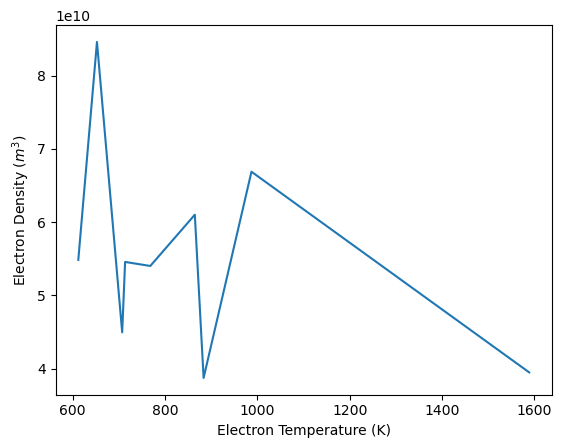

In [15]:
plt.plot(sorted_temperatures, sorted_densities)
plt.xlabel('Electron Temperature (K)')
plt.ylabel('Electron Density ($m^3$)')

In [16]:
temperatures = [864.6196781209961, 713.6397941673537, 652.7071121251162, 768.203720536197, 987.265697026141, 612.292531717369, 883.6351813950359, 707.3095343467148, 1588.7088935499557]
densities = [61015838882.32636, 54573412917.864746, 84594524958.30319, 54023121829.20537, 66884863586.521324, 54855489765.892914, 38746393847.296974, 44963054584.783264, 39500821321.38444]

zipped_data = list(zip(temperatures, densities))

sorted_data = sorted(zipped_data, key=lambda x: x[0])

sorted_temperatures, sorted_densities = zip(*sorted_data)

sorted_temperatures = np.array(sorted_temperatures)
sorted_densities = np.array(sorted_densities)

def polynomial_func(x, a, b, c):
    return a * x**2 + b * x + c

popt, pcov = curve_fit(polynomial_func, sorted_temperatures, sorted_densities)

a_fit, b_fit, c_fit = popt

fitted_densities = polynomial_func(sorted_temperatures, a_fit, b_fit, c_fit)

plt.scatter(sorted_temperatures, sorted_densities, label='Original Data')
plt.plot(sorted_temperatures, fitted_densities, color='red', label='Fitted Curve')
plt.xlabel('Temperature')
plt.ylabel('Density')
plt.title('Curve Fitting of Consecutive Data')
plt.legend()
plt.show()

print("Fitted Parameters:")
print("a =", a_fit)
print("b =", b_fit)
print("c =", c_fit)

NameError: name 'curve_fit' is not defined

In [ ]:
#OBJECTIVES:
#taking log on voltage axis to combat hysteresis
#cut off fit at v=1
#add legend of electron temp, density and time values (every 100th sweep)
#time plotted on x axis with ne vs time and te vs time (all)
#ne should increase generally, then fall back


### Cutting off at V=1


C:\Users\amand\AppData\Local\Temp\ipykernel_16612\1159506696.py:15: RuntimeWarning: invalid value encountered in sqrt
  return m *  np.sqrt(V-.5) + b


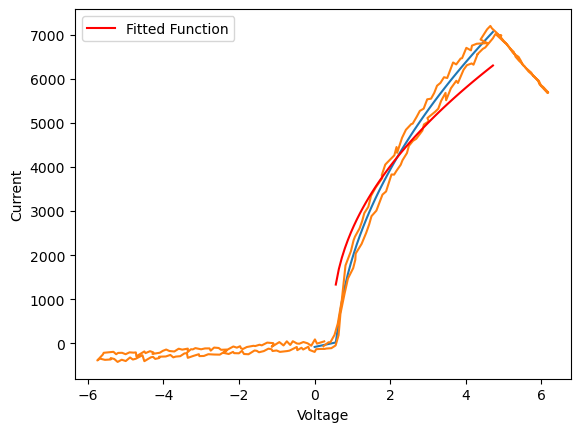

In [79]:
from scipy.optimize import curve_fit

I=packets['packets']['Medium']['1100']['Current0']
V=packets['packets']['Medium']['1100']['Voltage']

x, y, popt, pcov= R_fitting.gen_fit(np.array(V), np.array(I))

#print(popt)
#popt[3], popt[4]

plt.plot(x,y)
plt.plot(V,I)

def fitting_function(V, m, b):
    return m *  np.sqrt(V-.5) + b

cutoff_voltage = 1 
filtered_indices = V >= 1 
filtered_V = V[filtered_indices]
filtered_I = I[filtered_indices]

popt, pcov = curve_fit(fitting_function, filtered_V, filtered_I, p0=[1, 2])

plt.plot(x, fitting_function(x, *popt), 'r-', label='Fitted Function')

#plt.plot(V, I, label='Original data')
#plt.plot(V, fit_curve, label='Fitted curve', linestyle='--')
plt.xlabel('Voltage')
plt.ylabel('Current')
plt.legend()
plt.show()

#I have no idea if I am on the right track.
#Inital guesses don't change fitting

### Finding an exponential fit for the segment of IV curve

In [20]:

def gen_exp_fit(V_arr, I_arr):
    """
    Generates an exponential fit for a segment of the IV curve.

    Parameters:
    V_arr : np.array
        Voltage array.
    I_arr : np.array
        Current array.

    Returns:
    tuple
        V_fit (np.array): Voltage array for plotting the fit.
        I_fit (np.array): Fitted current array based on the exponential model.
        popt (list): Optimal values for the parameters (I0, alpha).
        pcov (2D array): Covariance matrix of the parameters.
    """
    # Initial guess for the parameters: [I0, alpha]
    guess = [np.max(I_arr), 0.01]  # Adjust based on your data

    # Perform the curve fit
    popt, pcov = curve_fit(exp_fit, V_arr, I_arr, p0=guess)

    # Generate fitted data for plotting
    V_fit = np.linspace(np.min(V_arr), np.max(V_arr), 200)
    I_fit = exp_fit(V_fit, *popt)

    return V_fit, I_fit, popt, pcov

# I have no idea what is going on. 